# TEST NOTEBOOK 
for exploration to keep mainscript clean  


In [5]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data')
proc.get_files_with_metadata()
# activate logging
proc.set_logging(True)
stack = proc.load_data()
stack = stack[:,50:-50:8,:,:]
#stack = stack[:,250:305,:,:]

stack.shape


(601, 0, 850, 1055)

Read image KINETIX_4speck_642_2_MMStack_Pos0.ome.tif; size (601, 2, 850, 1055); type uint16
Determine skew angle...


100%|██████████| 31/31 [00:07<00:00,  4.20it/s]


Best Angle: -0.19999999999999973 degrees
Max Line Count: 702.0


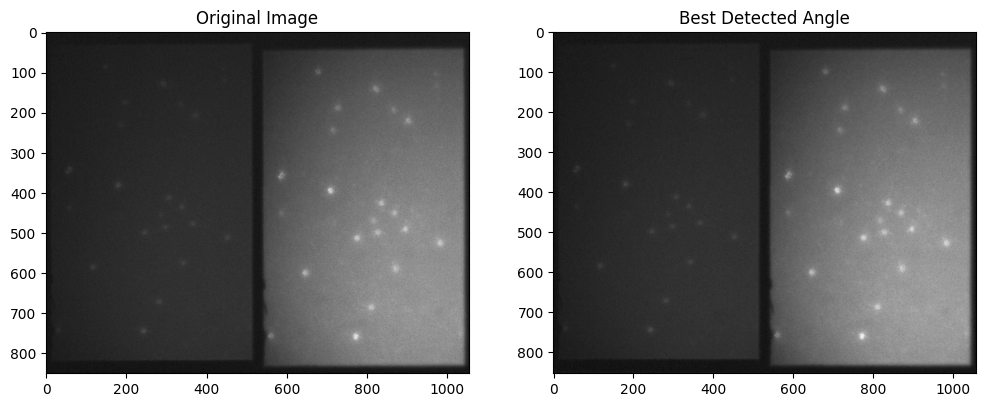

Rotating by skew angle...
Adaptive thresholding cam 0..


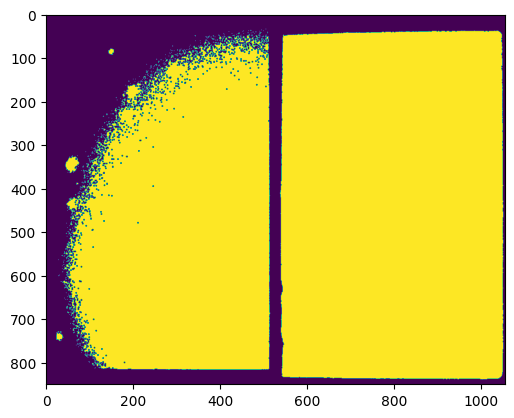

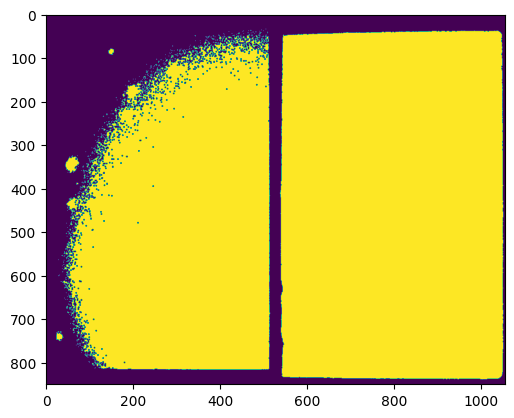

Determine skew angle...


100%|██████████| 31/31 [00:08<00:00,  3.75it/s]


Best Angle: 0.40000000000000036 degrees
Max Line Count: 678.0


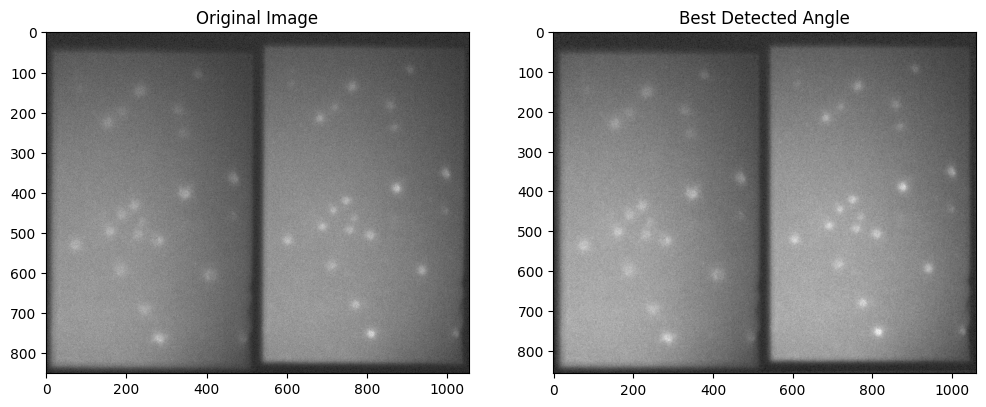

Rotating by skew angle...
Adaptive thresholding cam 1..


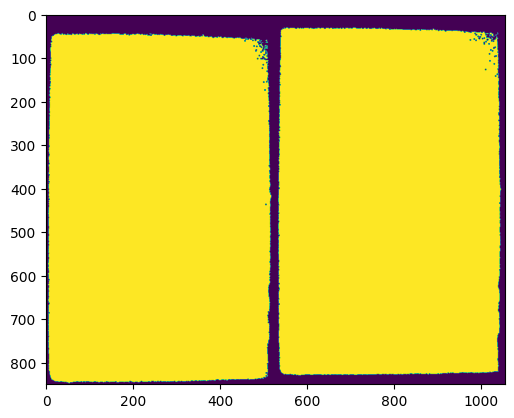

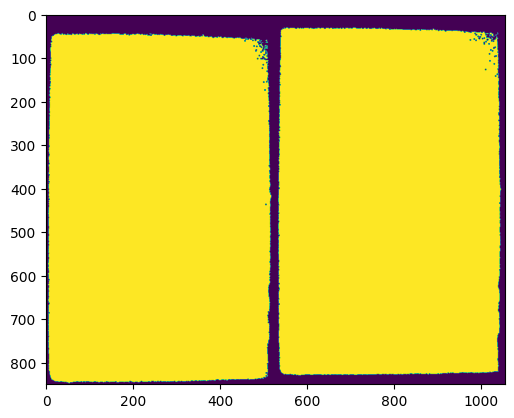

FOV size consolidation: 100%|██████████| 2/2 [00:23<00:00, 11.60s/it]


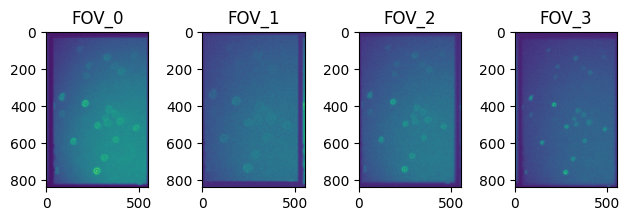

Using order [2, 3, 0, 1]
Registration of data...


Image plane: 100%|██████████| 3/3 [04:27<00:00, 89.21s/it]


{'fovs': {0: {0: [8, 502, 850, 1055], 1: [8, 0, 850, 553]},
  1: {0: [8, 502, 850, 1055], 1: [8, 0, 850, 553]}},
 'deg': {0: -0.19999999999999973, 1: 0.40000000000000036},
 'order': [2, 3, 0, 1],
 'dz': 620,
 'brightness': {0: 0.8225534981173044,
  1: 1.2835240069839868,
  2: 0.9467818271977029,
  3: 0.9471406677010061},
 'transform': array([[-4.0000e-05, -5.1012e-01],
        [-2.5712e-01, -1.3088e-01],
        [ 7.6846e-01, -2.0532e-01]])}

In [6]:
proc.calibrate(stack)

Estimating interplane distance..


SR-localising peaks: 100%|██████████| 4/4 [00:00<00:00, 15.03it/s]

Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1386 (0.00%) peaks in fitting due to irregular shape.
Skipped 63 / 1323 (4.76%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 73.80it/s]


Determining relative z-distances and order
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\cal_data\interplane_distance.svg
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\cal_data\interplane_distance.png


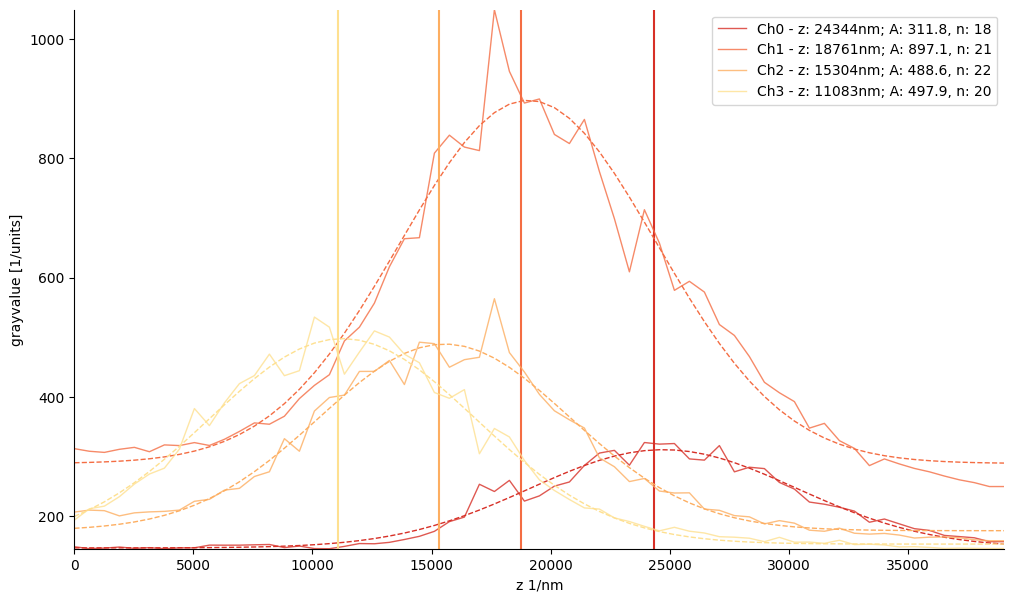

In [2]:
tracks = proc.estimate_interplane_distance(stack)

In [8]:
proc.cal

{}

In [1]:
import skimage as skim
from multiplane_calibration import MultiplaneCalibration
# Initialize the MultiplaneProcess class
calib = MultiplaneCalibration()
fname = r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\KINETIX_4speck_642_2_MMStack_Pos0.ome.tif'
stack = skim.io.imread(fname)
stack = stack[:,50:-50:8,:,:]


Estimating interplane distance..


SR-localising peaks:  50%|█████     | 2/4 [00:00<00:00, 10.20it/s]

Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:00<00:00, 10.79it/s]

Skipped 0 / 1386 (0.00%) peaks in fitting due to irregular shape.
Skipped 63 / 1323 (4.76%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 55.57it/s]

Determining relative z-distances and order


{'dz': [6.8082179780155165, 5.575205472022706, 9.005656782039566],
 'labels': ['1-0', '2-1', '3-2']}

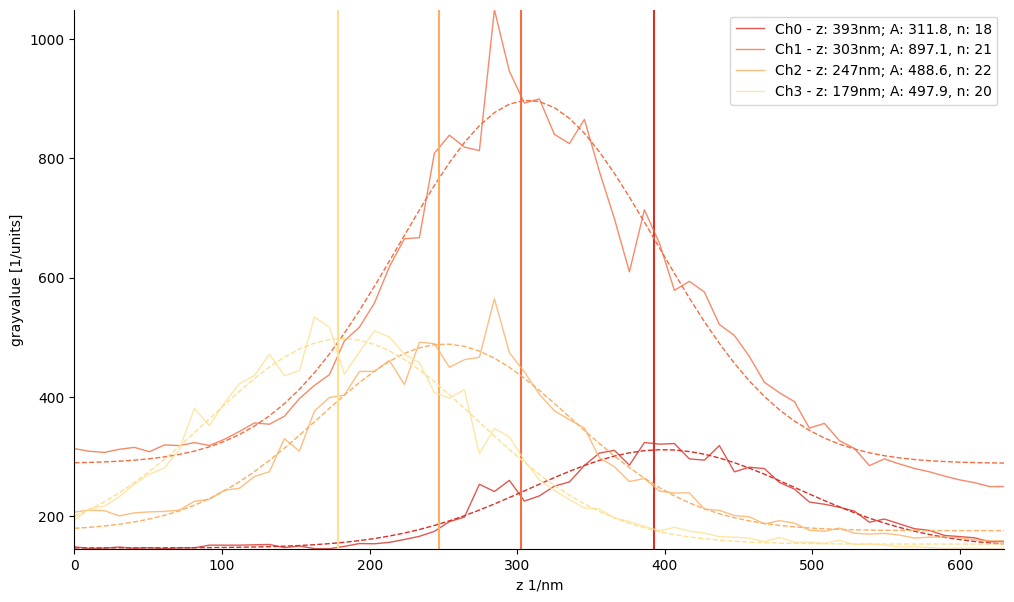

In [2]:
calib.estimate_interplane_distance(stack)

In [ ]:
calib.get_transformation(stack)

Calculating transform:  75%|███████▌  | 3/4 [00:00<00:00, 748.98it/s]


In [6]:
calib.transform

{1: array([[ 1.00182136e+00, -6.70949341e-04, -6.68771941e-01],
        [-1.09983619e-03,  1.00125233e+00,  8.47181937e+00]]),
 2: array([[ 1.00056648e+00, -7.10722306e-04, -8.06170627e+00],
        [-1.22646351e-03,  1.00035889e+00, -8.88898675e+00]]),
 3: array([[ 1.00166896e+00, -1.42586306e-03,  7.71941743e+00],
        [-4.59780413e-04,  1.00143583e+00,  7.34028201e+00]])}

Estimating interplane distance..


SR-localising peaks:  75%|███████▌  | 3/4 [00:00<00:00, 11.17it/s]

Skipped 0 / 1386 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 63 / 1323 (4.76%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 52.64it/s]


Determining relative z-distances and order


Slice: 100%|██████████| 63/63 [00:03<00:00, 17.67it/s]


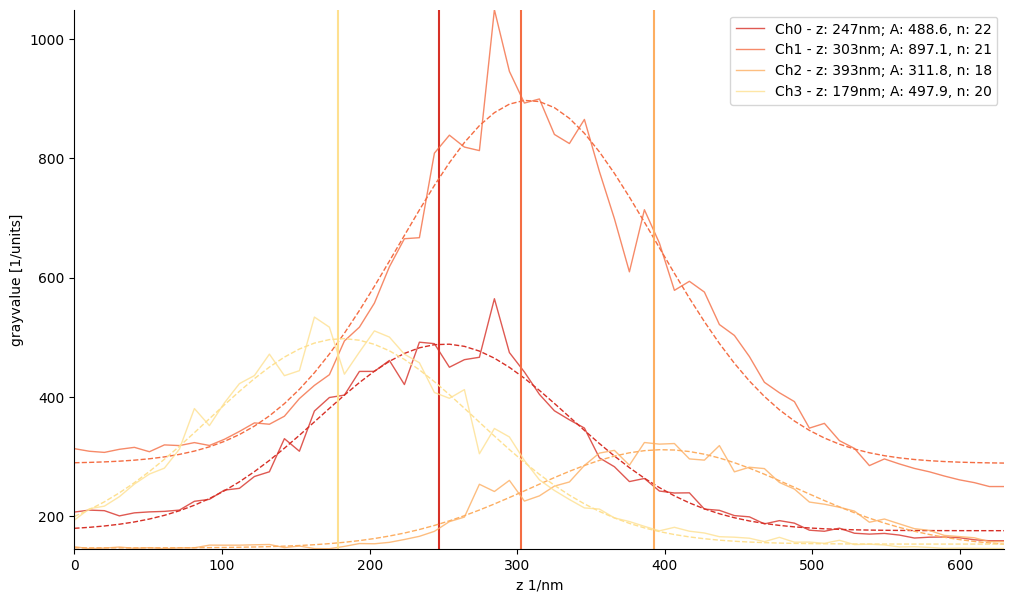

In [2]:
stack.shape
stack_test = stack.copy()
stack_test[0,...] = stack[2,...] 
stack_test[2,...] = stack[0,...]  
calib.estimate_interplane_distance(stack_test)
calib.get_transformation(stack_test)
stack_out = calib.apply_transformation(stack_test)

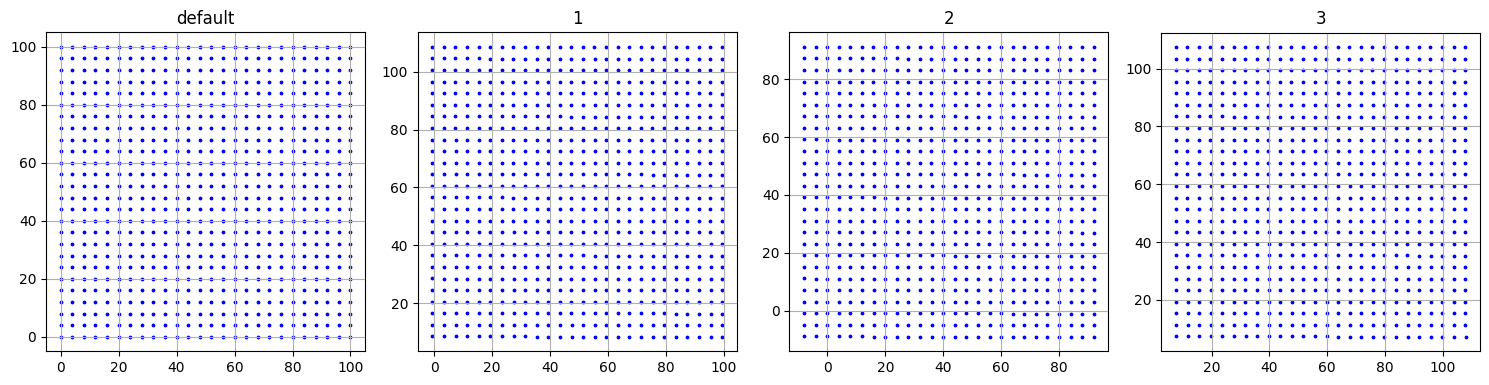

In [3]:
calib.display_transformations()

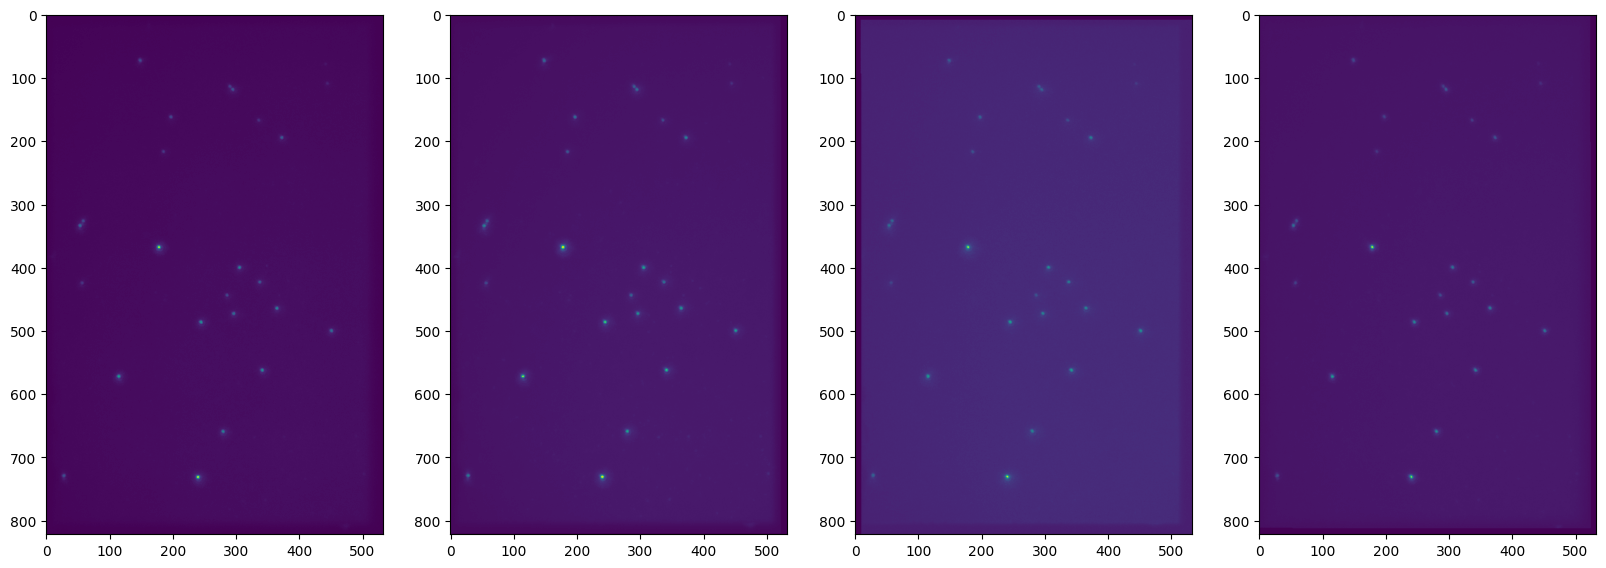

In [4]:
import matplotlib.pyplot as plt
import numpy as np
s = 2
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,15))
ax1.imshow(np.max(stack_test[0,...], axis=0))
ax2.imshow(np.max(stack_test[1,...], axis=0))
ax3.imshow(np.max(stack_test[2,...], axis=0))
ax4.imshow(np.max(stack_test[3,...], axis=0))


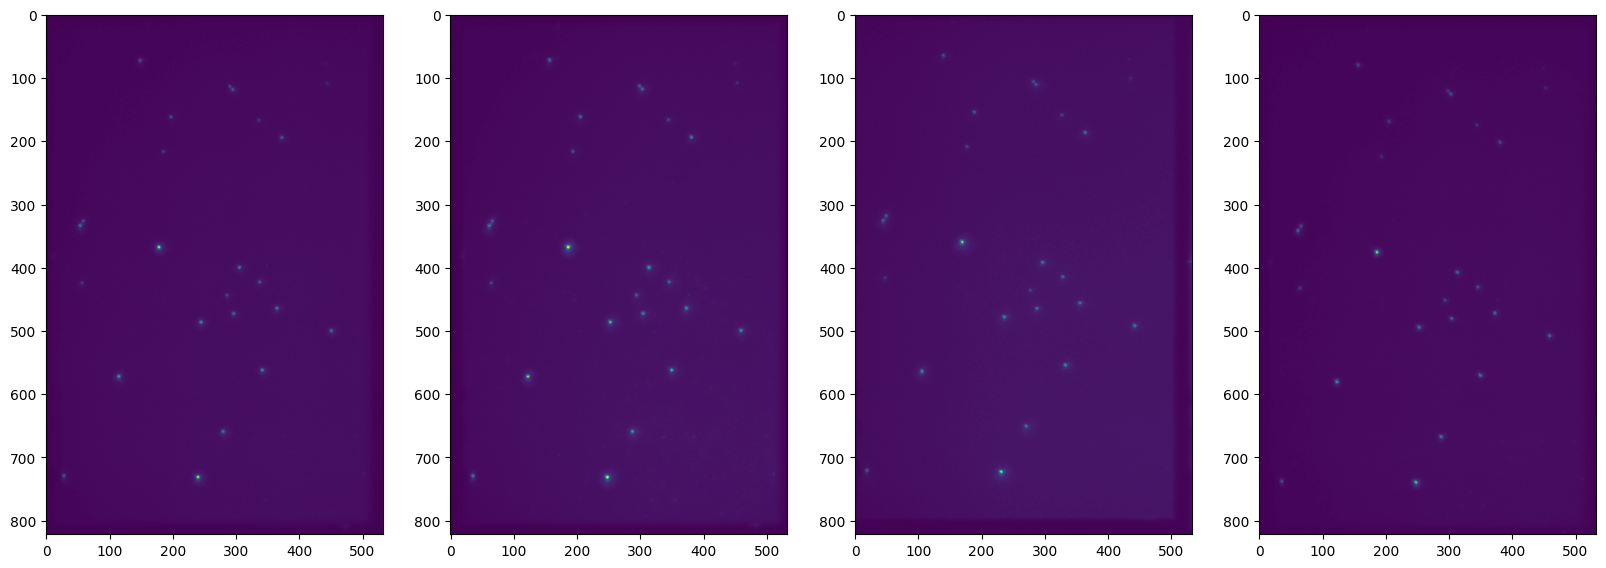

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,15))
ax1.imshow(np.max(stack[2,...], axis=0))
ax2.imshow(np.max(stack[1,...], axis=0))
ax3.imshow(np.max(stack[0,...], axis=0))
ax4.imshow(np.max(stack[3,...], axis=0))

In [3]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()
#proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data')
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2')
proc.get_files_with_metadata()
# activate logging
proc.set_logging(True)
stack = proc.load_data()
stack = stack[50:-50:8,:,:,:]
#stack = stack[:,250:305,:,:]

stack.shape


(63, 2, 850, 1055)

Read image KINETIX_4speck_642_2_MMStack_Pos0.ome.tif; size (601, 2, 850, 1055); type uint16
Determine skew angle...


100%|██████████| 31/31 [00:07<00:00,  3.98it/s]


Best Angle: -0.19999999999999973 degrees
Max Line Count: 702.0


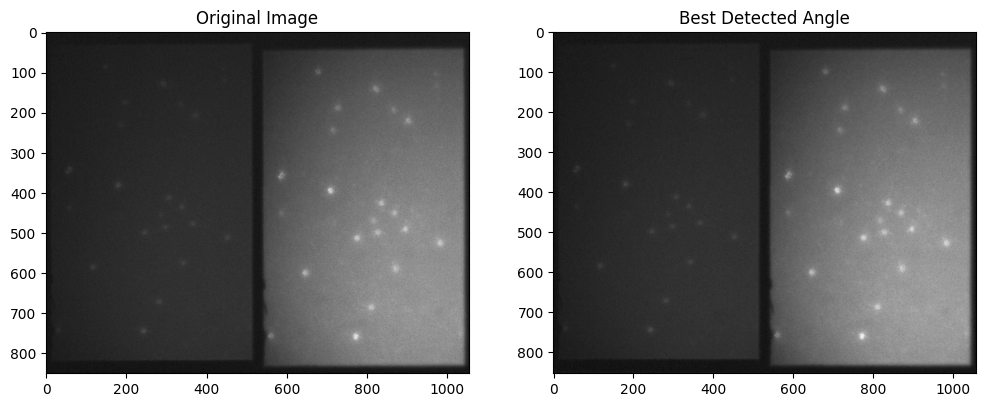

Rotating by skew angle...
Adaptive thresholding cam 0..


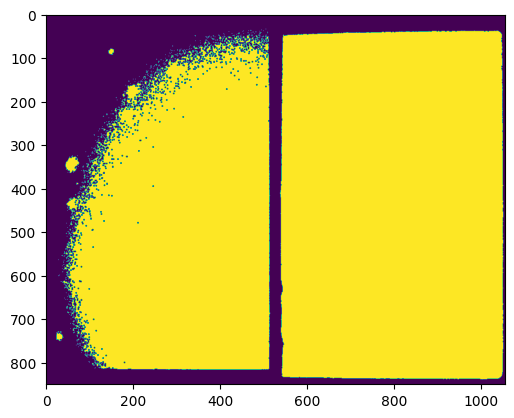

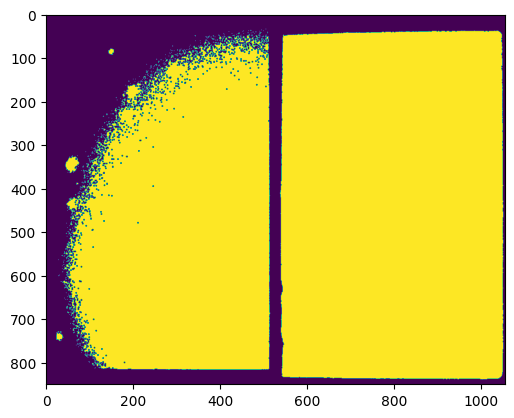

Determine skew angle...


100%|██████████| 31/31 [00:06<00:00,  4.48it/s]


Best Angle: 0.40000000000000036 degrees
Max Line Count: 678.0


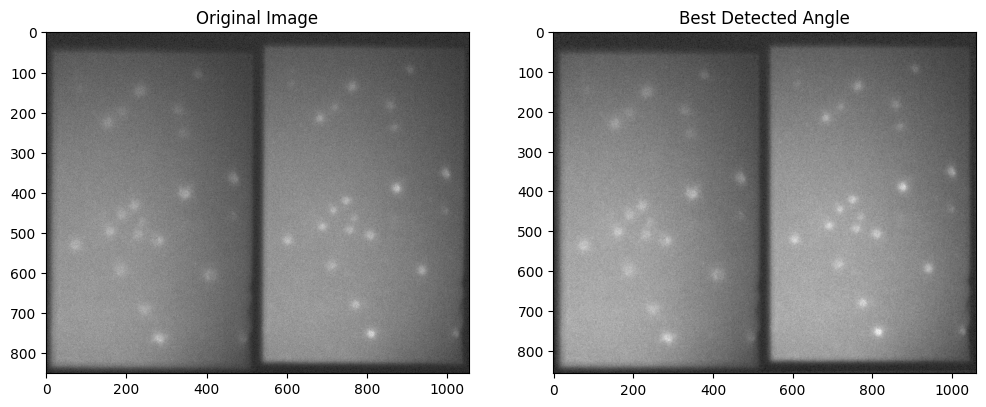

Rotating by skew angle...
Adaptive thresholding cam 1..


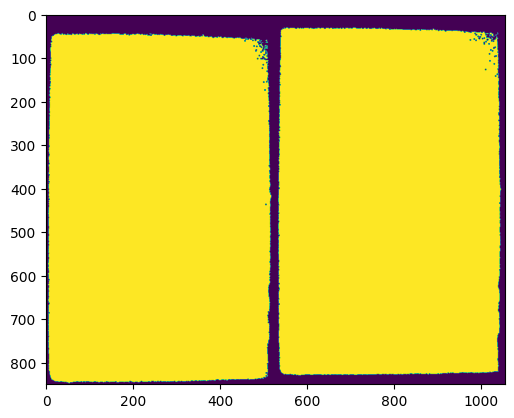

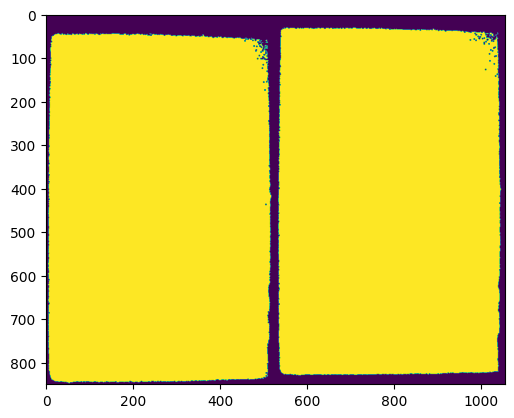

FOV size consolidation: 100%|██████████| 2/2 [00:16<00:00,  8.15s/it]


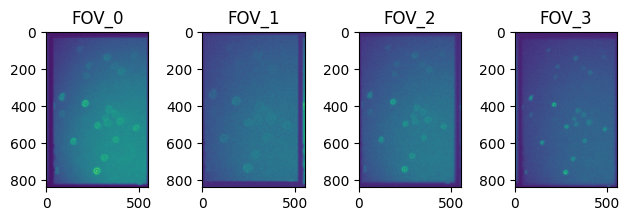

Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:01<00:04,  1.64s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [00:03<00:03,  1.74s/it]

Skipped 1202 / 15025 (8.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [00:04<00:01,  1.53s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

Skipped 601 / 12621 (4.76%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 19.26it/s]

Determining relative z-distances and order


Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\interplane_distance.svg
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\interplane_distance.png

Using order [3 2 0 1]


Calculating transform:  75%|███████▌  | 3/4 [00:00<00:00, 194.06it/s]


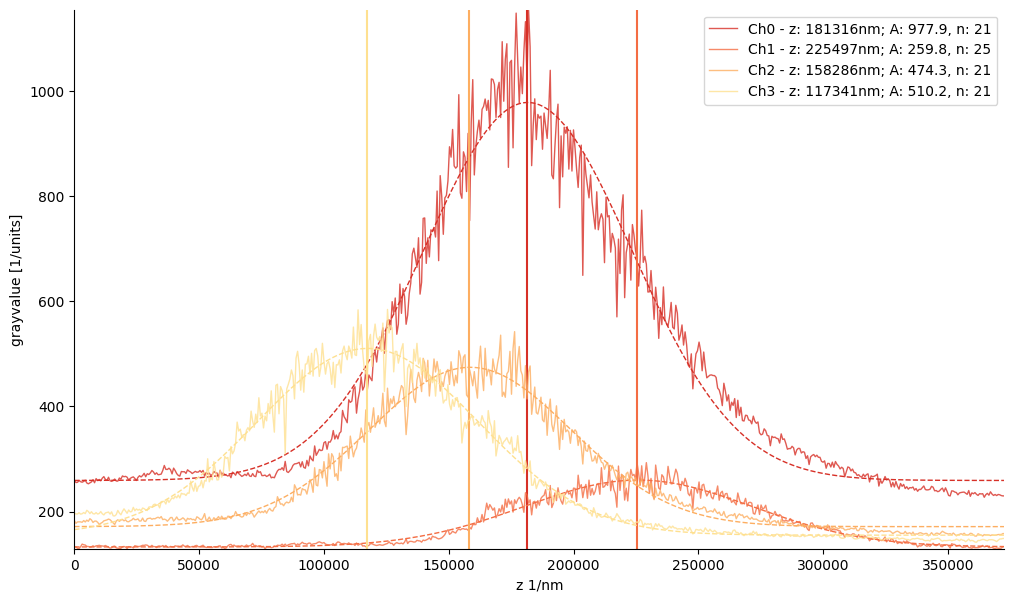

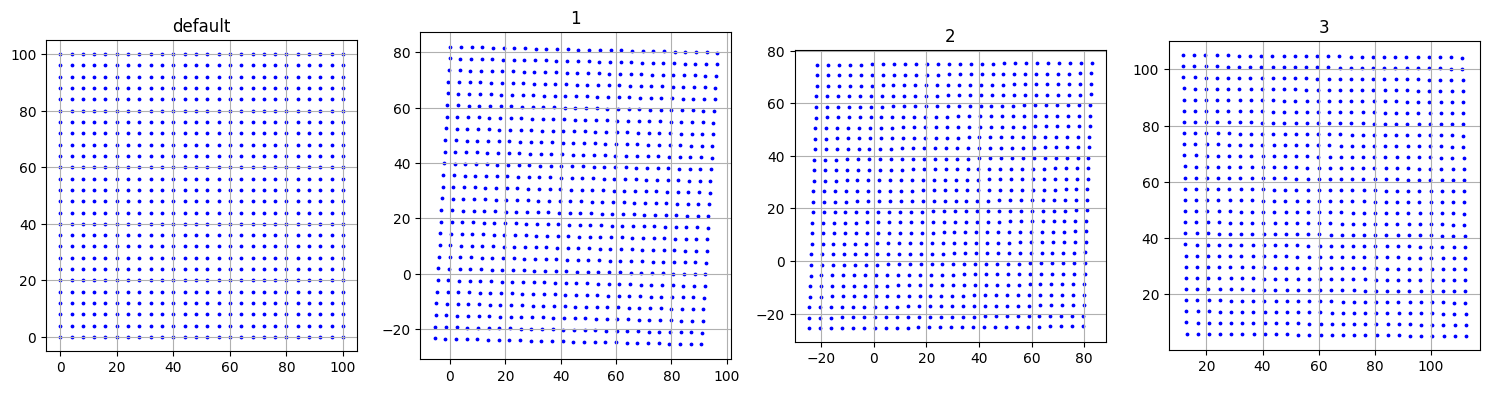

Registration of data...


Slice: 100%|██████████| 601/601 [00:44<00:00, 13.65it/s]


TypeError: Object of type MultiplaneCalibration is not JSON serializable

In [4]:
proc.calibrate(is_bead=True)